In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import preprocessing
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib
import joblib

In [2]:
args = {
    "dataset": "confidential/train150.txt",
    "model": "out/wind_speed_nn.model",
    "plot": "out/wind_speed_plot.png",
    "norm": "out/wind_speed_norm"
}

In [3]:
np.random.seed(8)

In [4]:
dataframe = pd.read_csv(args["dataset"], delimiter="\t", header=None)
dataset = dataframe.values

In [5]:
X = dataset[:-1]
Y = dataset[1:, 4]

In [6]:
# partition the data into training and testing splits using 75% of
# the data for training and the remaining 25% for testing
(X_train, X_test, Y_train, Y_test) = train_test_split(
    X, Y, test_size=0.25, random_state=42
)

In [7]:
scaler = preprocessing.MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# save scale of x
joblib.dump(scaler, "{}_x.joblib".format(args["norm"]))

['out/wind_speed_norm_x.joblib']

In [8]:
Y_train = scaler.fit_transform(Y_train.reshape(-1, 1))
Y_test = scaler.transform(Y_test.reshape(-1, 1))

# save scale of y
joblib.dump(scaler, "{}_y.joblib".format(args["norm"]))

['out/wind_speed_norm_y.joblib']

In [9]:
# define the 9-9-6-1 architecture using tf.keras
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(9, input_shape=(9,), activation="tanh"))
model.add(tf.keras.layers.Dense(9, activation="tanh"))
model.add(tf.keras.layers.Dense(6, activation="tanh"))
model.add(tf.keras.layers.Dense(1, activation="linear"))

Instructions for updating:
Colocations handled automatically by placer.


In [10]:
# initialize our initial learning rate and # of epochs to train for
# INIT_LR = 0.01
EPOCHS = 100

# compile the model using SGD as our optimizer and categorical
# cross-entropy loss (you'll want to use binary_crossentropy
# for 2-class classification)
print("[INFO] training network...")
# opt = tf.keras.optimizers.SGD(lr=INIT_LR)
model.compile(loss="mse", optimizer="sgd", metrics=["mae", "mse"])

# train the neural network
H = model.fit(
    X_train,
    Y_train,
    validation_data=(X_test, Y_test),
    epochs=EPOCHS,
    batch_size=1,
)

[INFO] training network...
Instructions for updating:
Use tf.cast instead.
Train on 411 samples, validate on 138 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
411/411 [==============================] - 1s 3ms/sample - loss: 0.0363 - mean_absolute_error: 0.1519 - mean_squared_error: 0.0363 - val_loss: 0.0291 - val_mean_absolute_error: 0.1377 - val_mean_squared_error: 0.0291
Epoch 2/100
411/411 [==============================] - 1s 2ms/sample - loss: 0.0205 - mean_absolute_error: 0.1124 - mean_squared_error: 0.0205 - val_loss: 0.0201 - val_mean_absolute_error: 0.1158 - val_mean_squared_error: 0.0201
Epoch 3/100
411/411 [==============================] - 1s 2ms/sample - loss: 0.0163 - mean_absolute_error: 0.1003 - mean_squared_error: 0.0163 - val_loss: 0.0160 - val_mean_absolute_error: 0.1015 - val_mean_squared_error: 0.0160
Epoch 4/100
411/411 [==============================] - 1s 2ms/sample - loss: 0.0144 - mean_absolute_error: 0.0929 - mean_squared_error: 0.0144 -

Epoch 34/100
411/411 [==============================] - 1s 2ms/sample - loss: 0.0105 - mean_absolute_error: 0.0798 - mean_squared_error: 0.0105 - val_loss: 0.0088 - val_mean_absolute_error: 0.0751 - val_mean_squared_error: 0.0088
Epoch 35/100
411/411 [==============================] - 1s 2ms/sample - loss: 0.0103 - mean_absolute_error: 0.0805 - mean_squared_error: 0.0103 - val_loss: 0.0088 - val_mean_absolute_error: 0.0746 - val_mean_squared_error: 0.0088
Epoch 36/100
411/411 [==============================] - 1s 2ms/sample - loss: 0.0106 - mean_absolute_error: 0.0801 - mean_squared_error: 0.0106 - val_loss: 0.0088 - val_mean_absolute_error: 0.0749 - val_mean_squared_error: 0.0088
Epoch 37/100
411/411 [==============================] - 1s 2ms/sample - loss: 0.0104 - mean_absolute_error: 0.0798 - mean_squared_error: 0.0104 - val_loss: 0.0089 - val_mean_absolute_error: 0.0749 - val_mean_squared_error: 0.0089
Epoch 38/100
411/411 [==============================] - 1s 2ms/sample - loss: 0.

Epoch 70/100
411/411 [==============================] - 1s 2ms/sample - loss: 0.0102 - mean_absolute_error: 0.0791 - mean_squared_error: 0.0102 - val_loss: 0.0091 - val_mean_absolute_error: 0.0759 - val_mean_squared_error: 0.0091
Epoch 71/100
411/411 [==============================] - 1s 2ms/sample - loss: 0.0103 - mean_absolute_error: 0.0782 - mean_squared_error: 0.0103 - val_loss: 0.0092 - val_mean_absolute_error: 0.0765 - val_mean_squared_error: 0.0092
Epoch 72/100
411/411 [==============================] - 1s 2ms/sample - loss: 0.0098 - mean_absolute_error: 0.0768 - mean_squared_error: 0.0098 - val_loss: 0.0090 - val_mean_absolute_error: 0.0754 - val_mean_squared_error: 0.0090
Epoch 73/100
411/411 [==============================] - 1s 2ms/sample - loss: 0.0099 - mean_absolute_error: 0.0785 - mean_squared_error: 0.0099 - val_loss: 0.0114 - val_mean_absolute_error: 0.0852 - val_mean_squared_error: 0.0114
Epoch 74/100
411/411 [==============================] - 1s 2ms/sample - loss: 0.

In [11]:
# evaluate the model
scores = model.evaluate(X_test, Y_test)
print(
    "{}: {}\n{}: {}".format(
        model.metrics_names[1], scores[1], model.metrics_names[2], scores[2]
    )
)

138/138 [==============================] - 0s 341us/sample - loss: 0.0090 - mean_absolute_error: 0.0752 - mean_squared_error: 0.0090
mean_absolute_error: 0.07517893612384796
mean_squared_error: 0.008987250737845898


In [12]:
# evaluate the model
# print("[INFO] evaluating network...")
# predictions = model.predict(testX, batch_size=1)
# print(
#     classification_report(
#         testY.argmax(axis=1),
#         predictions.argmax(axis=1),
#         target_names=lb.classes_,
#     )
# )

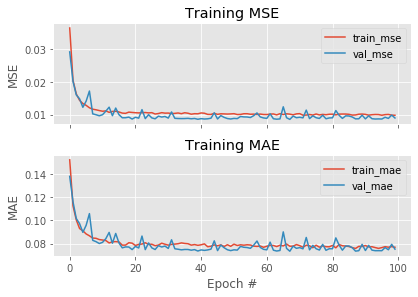

In [13]:
# plot the training loss, MAE and MSE
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
_, axs = plt.subplots(2, 1, sharex=True)
axs[0].plot(N, H.history["mean_squared_error"], label="train_mse")
axs[0].plot(N, H.history["val_mean_squared_error"], label="val_mse")
axs[0].set_title("Training MSE")
axs[0].set_ylabel("MSE")
axs[0].legend()
axs[1].plot(N, H.history["mean_absolute_error"], label="train_mae")
axs[1].plot(N, H.history["val_mean_absolute_error"], label="val_mae")
axs[1].set_title("Training MAE")
axs[1].set_ylabel("MAE")
axs[1].legend()
plt.tight_layout()
plt.xlabel("Epoch #")
plt.savefig(args["plot"])

In [14]:
# save the model to disk
print("[INFO] serializing network...")
model.save(args["model"])

[INFO] serializing network...
